# Copying images to train, validation and test directories

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os, shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'D:/MY_work/pythonProgram/FocalSweepDataset' 
try:
    os.mkdir(original_dataset_dir)
except:
     pass
# The directory where we will
# store our smaller dataset
base_dir = 'D:/MY_work/pythonProgram/Kernal_size_train'
try:
    os.mkdir(base_dir)
except:
     pass
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except:
     pass
validation_dir = os.path.join(base_dir, 'validation')
try:
    os.mkdir(validation_dir)
except:
     pass
test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except:
    pass

# Directory with our training images
train_images_dir = os.path.join(train_dir, 'images')
try:
    os.mkdir(train_images_dir)
except:
    pass

#Directory with our validation images
validation_images_dir = os.path.join(validation_dir, 'images')
try:
    os.mkdir(validation_images_dir)
except:
    pass
# Directory with our validation images
test_images_dir = os.path.join(test_dir, 'images')
try:
    os.mkdir(test_images_dir)
except:
    pass


# Directory with our training depths
train_depths_dir = os.path.join(train_dir, 'depths')
try:
    os.mkdir(train_depths_dir)
except:
    pass

#Directory with our validation depths
validation_depths_dir = os.path.join(validation_dir, 'depths')
try:
    os.mkdir(validation_depths_dir)
except:
    pass
# Directory with our validation depths 
test_depths_dir = os.path.join(test_dir, 'depths')
try:
    os.mkdir(test_depths_dir)
except:
    pass

# Copy first 1000 cat images to train_images_dir
fnames = ['{}.png'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_images_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to validation_images_dir
fnames = ['{}.png'.format(i) for i in range(1000, 1200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_images_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to test_images_dir
fnames = ['{}.png'.format(i) for i in range(1200, 1449)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_images_dir, fname)
    shutil.copyfile(src, dst)
# Copy first 1000 dog images to train_depths_dir
fnames = ['{}depths.png'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_depths_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to validation_depths_dir
fnames = ['{}depths.png'.format(i) for i in range(1000, 1200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_depths_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to test_depths_dir
fnames = ['{}depths.png'.format(i) for i in range(1200, 1449)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_depths_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print('total training images:', len(os.listdir(train_images_dir)))
print('total training depths:', len(os.listdir(train_depths_dir)))
print('total validation images:', len(os.listdir(validation_images_dir)))
print('total validation depths:', len(os.listdir(validation_depths_dir)))
print('total test images:', len(os.listdir(test_images_dir)))
print('total test depths:', len(os.listdir(test_depths_dir)))

total training images: 1000
total training depths: 1000
total validation images: 200
total validation depths: 200
total test images: 249
total test depths: 249


# Convnet for training

In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(480, 640, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(3, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='relu',padding='same'))
#model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [13]:
from keras import optimizers
model.compile(loss='mse',
              optimizer=optimizers.Adam(lr=1e-4),
               metrics=['mse'])

In [48]:
from os import listdir
from PIL import Image as PImage
import cv2



def readImages(path,number):
    # return array of images
    readImages=np.empty((number+1, 480,640,3), dtype='f')
    imagesList = listdir(path)
    i=0
    for image in imagesList[:number]:
        img = cv2.imread(path + image).astype(np.float32)
        mean=img.mean()
        std=img.std()
        img-=mean.astype(np.float32)
        img/=std.astype(np.float32)
        readImages[i, :, :, :] = img
        i+=1
    return readImages

def readDepths(path,number):
    # return array of images
    readDepths=np.empty((number, 480,640,1), dtype='f')
    DepthsList = listdir(path)
    i=0
    for depth in DepthsList[:number]:
        dep = cv2.imread(path + depth)
        dep_gray=dep[:,:,0]
        readDepths[i, :, :,0] = dep_gray/100
        i+=1
    return readDepths


def readOriImg(path,number):
    # return array of images
    readOrImg=np.empty((number+1, 480,640,3))
    imagesList = listdir(path)
    i=0
    for image in imagesList[:number]:
        img = cv2.imread(path + image)
        readOrImg[i, :, :, :] = img
        i+=1
    return readOrImg

In [ ]:
# your images in an array
imagesdata_train= readImages(train_images_dir+'/',1000)
depthsdata_target= readDepths(train_depths_dir+'/',1000)
# imagedata_train = np.asarray(imagedata_train)
# depthdata_train = np.asarray(depthdata_train)
imagesdata_validation=readImages(validation_images_dir+'/',200)
depthsdata_validation=readDepths(validation_depths_dir+'/',200)

In [21]:
history=model.fit(imagesdata_train,
                  depthsdata_target,
                   epochs=1,
                   batch_size=5,
                   validation_data=(imagesdata_validation,depthsdata_validation))

Train on 1000 samples, validate on 200 samples
Epoch 1/1
1000/1000 [==============================] - 1918s 2s/step - loss: 1.1309 - mean_squared_error: 1.1310 - val_loss: 0.7439 - val_mean_squared_error: 0.7439


In [22]:
model.save('blur_size_pred.h5')

In [36]:
test_data=readImages(test_images_dir+'/',5)
predicted_depths=model.predict(test_data)*100

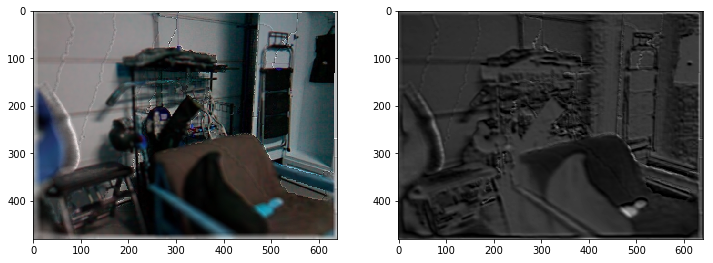

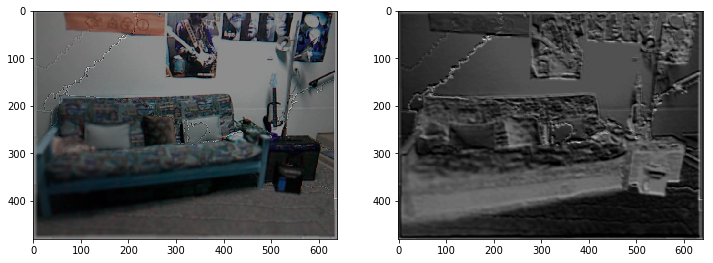

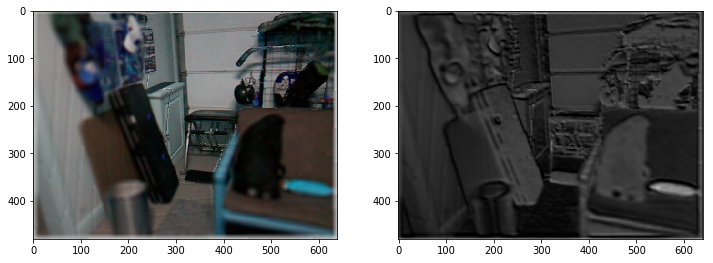

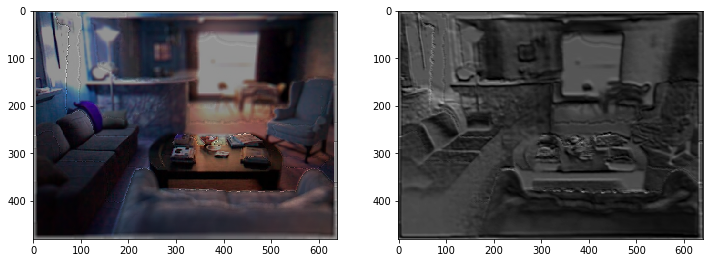

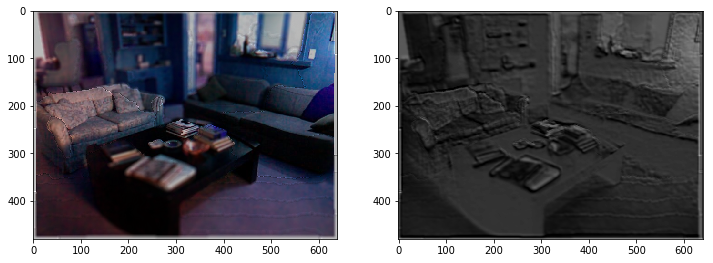

In [65]:
test_img=readOriImg(test_images_dir+'/',5)
test_img=test_img.astype(np.uint8)

for i in range(5):
    fig=plt.figure(figsize=(12, 12))
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(test_img[i,:,:,:])
    fig.add_subplot(rows, columns, 2)
    test_depth=predicted_depths[i,:,:,0]
    test_depth=np.uint8(test_depth*255/test_depth.max())
    plt.imshow(test_depth,cmap='gray')
    plt.show()  

In [59]:
test_img.max()

255.0

In [8]:
c = np.array([[[1,1],[1,2],[1,3],[1,4]],[[1,1],[1,2],[1,3],[1,4]],[[1,1],[1,2],[1,3],[1,4]]])

In [10]:
c.shape[0]

3

In [22]:
import math
b =np.array([[1],[3]])
c=np.array([2])
d=b.append(c)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [27]:
b=np.array([[1],[2]])
b.shape[0]

2